In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/basement/Desktop/UnitedHealthcare/Rudin


In [79]:
diabetic = pd.read_csv("./dataset_diabetes/diabetic_data.csv")
idmapping = pd.read_csv("./dataset_diabetes/IDs_mapping.csv")

In [39]:
diabetic.shape

(101766, 50)

In [80]:
diabetic = diabetic.replace("?",np.NaN)

In [81]:
#convert readmission rate into a binary 
diabetic['readmitin30days'] = np.where(diabetic.readmitted=="<30",1,0)

In [82]:
diabetic.readmitin30days.value_counts()

0    90409
1    11357
Name: readmitin30days, dtype: int64

In [83]:
diabetic.isna().any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [84]:
diabetic.columns[diabetic.isna().any()]

Index(['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3'],
      dtype='object')

In [85]:
diabetic.payer_code.isna().sum()

40256

In [86]:
diabetic.payer_code.unique()

array([nan, 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [87]:
diabetic.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitin30days'],
      dtype='object')

In [88]:
len(diabetic.encounter_id.unique())
#encounter id is visit id 

101766

In [89]:
idmapping

for i in range(0,67):
    if type(idmapping['admission_type_id'][i]) == str:
        if len(idmapping['admission_type_id'][i]) > 2:
            print(i)

9
41


In [90]:
idmapping2 = idmapping[0:8]
idmapping3 = idmapping[10:40]
idmapping4 = idmapping[42:67]

idmapping3 = idmapping3.rename(index=str, columns={"admission_type_id":"discharge_disposition_id"})
idmapping4 = idmapping4.rename(index=str, columns={"admission_type_id":"admission_source_id"})

In [91]:
idmapping2.admission_type_id = idmapping2.admission_type_id.astype(int)
idmapping3.discharge_disposition_id = idmapping3.discharge_disposition_id.astype(int)
idmapping4.admission_source_id = idmapping4.admission_source_id.astype(int)

In [92]:
diabetic = diabetic.merge(idmapping2, how = 'inner', on = ['admission_type_id'])
diabetic = diabetic.merge(idmapping3, how = 'inner', on = ['discharge_disposition_id'])
diabetic = diabetic.merge(idmapping4, how = 'inner', on = ['admission_source_id'])

In [93]:
diabetic = diabetic.rename(index =str, columns = {"description_x":'admission_type', "description_y":'discharge_disposition', "description":'admission_source'})

In [94]:
diabetic

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitin30days,admission_type,discharge_disposition,admission_source
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,NO,0,NaN,Not Mapped,Physician Referral
1,1968528,720936,Caucasian,Female,[70-80),NaN,6,25,1,10,...,No,No,No,Ch,Yes,>30,0,NaN,Not Mapped,Physician Referral
2,2223336,558360,AfricanAmerican,Female,[60-70),NaN,6,25,1,9,...,No,No,No,No,No,NO,0,NaN,Not Mapped,Physician Referral
3,2298006,2519748,Caucasian,Male,[60-70),NaN,6,25,1,4,...,No,No,No,Ch,Yes,NO,0,NaN,Not Mapped,Physician Referral
4,2356308,608841,AfricanAmerican,Female,[50-60),NaN,6,25,1,1,...,No,No,No,No,Yes,>30,0,NaN,Not Mapped,Physician Referral
5,2363592,1059561,Caucasian,Female,[50-60),NaN,6,25,1,1,...,No,No,No,No,Yes,NO,0,NaN,Not Mapped,Physician Referral
6,2398146,8147493,Caucasian,Male,[60-70),NaN,6,25,1,1,...,No,No,No,No,Yes,NO,0,NaN,Not Mapped,Physician Referral
7,2422806,3377124,Caucasian,Male,[40-50),NaN,6,25,1,14,...,No,No,No,Ch,Yes,>30,0,NaN,Not Mapped,Physician Referral
8,2466036,4311585,Caucasian,Male,[60-70),NaN,6,25,1,10,...,No,No,No,Ch,Yes,>30,0,NaN,Not Mapped,Physician Referral
9,2473188,981198,Caucasian,Female,[60-70),NaN,6,25,1,5,...,No,No,No,No,Yes,>30,0,NaN,Not Mapped,Physician Referral


__EDA__

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


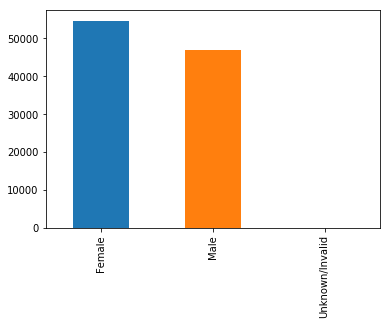

In [95]:
#gender count
print(diabetic.gender.value_counts())
diabetic.gender.value_counts().plot(kind="bar")

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


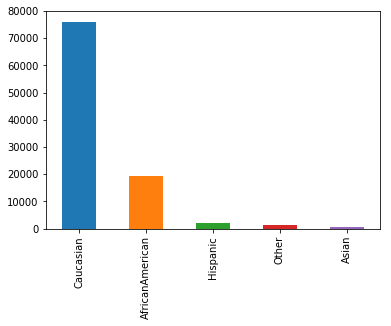

In [96]:
#race count
print(diabetic.race.value_counts())
diabetic.race.value_counts().plot(kind="bar")

In [97]:
diabetic['time_in_hospital']

0          1
1         10
2          9
3          4
4          1
5          1
6          1
7         14
8         10
9          5
10         5
11         6
12         6
13         4
14         7
15         5
16         8
17        13
18         3
19         1
20         6
21         4
22         4
23         4
24        10
25         3
26         3
27        12
28         2
29         1
          ..
101736    12
101737     2
101738     4
101739     8
101740    11
101741     1
101742     4
101743     3
101744     2
101745     1
101746     1
101747     5
101748     6
101749     4
101750     3
101751     8
101752     4
101753     3
101754     7
101755     9
101756     1
101757     9
101758    12
101759    10
101760    12
101761    14
101762    11
101763    13
101764     8
101765    14
Name: time_in_hospital, Length: 101766, dtype: int64

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


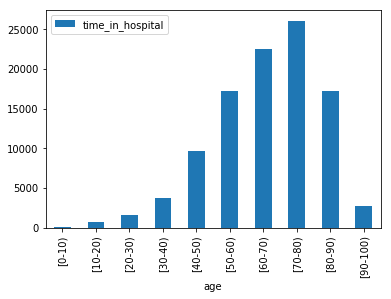

In [98]:
#age count
print(diabetic.age.value_counts())
diabetic[['age','time_in_hospital']].groupby('age').count().plot(kind="bar")

          time_in_hospital
age                       
[0-10)            2.546584
[10-20)           3.191027
[20-30)           3.564876
[30-40)           3.799735
[40-50)           4.039649
[50-60)           4.125753
[60-70)           4.382244
[70-80)           4.590878
[80-90)           4.808629
[90-100)          4.755818


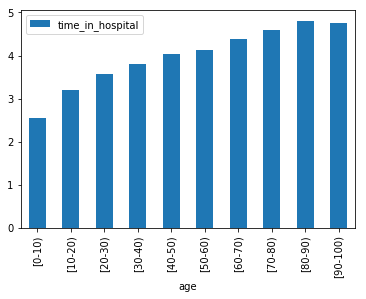

In [99]:
#average time in hospital group by age
print(diabetic[['age','time_in_hospital']].groupby(['age']).mean())
ave_age_time = diabetic[['age','time_in_hospital']].groupby(['age']).mean()
ave_age_time.plot(kind='bar')

                time_in_hospital
admission_type                  
Elective                4.320473
Emergency               4.378274
Newborn                 3.200000
Not Available           3.947126
Not Mapped              3.062500
Trauma Center           4.857143
Urgent                  4.610714


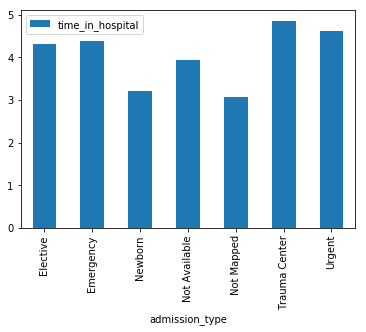

In [103]:
#average time in hospital group by admission type
print(diabetic[['admission_type','time_in_hospital']].groupby(['admission_type']).mean())
ave_adm_time = diabetic[['admission_type','time_in_hospital']].groupby(['admission_type']).mean()
ave_adm_time.plot(kind='bar')

                 time_in_hospital
readmitin30days                  
0                        4.349224
1                        4.768249


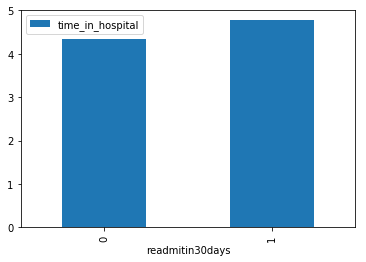

In [105]:
#average time in hospital group by readmission with 30 day
print(diabetic[['readmitin30days','time_in_hospital']].groupby(['readmitin30days']).mean())
ave_adm_time = diabetic[['readmitin30days','time_in_hospital']].groupby(['readmitin30days']).mean()
ave_adm_time.plot(kind='bar')

                                                    time_in_hospital
discharge_disposition                                               
Admitted as an inpatient to this hospital                   4.619048
Discharged to home                                          3.700634
Discharged/transferred to ICF                               5.355828
Discharged/transferred to SNF                               5.786656
Discharged/transferred to a federal health care...          7.800000
Discharged/transferred to a long term care hosp...          7.058252
Discharged/transferred to a nursing facility ce...          3.937500
Discharged/transferred to another rehab fac inc...          5.789262
Discharged/transferred to another short term ho...          3.862782
Discharged/transferred to another type of inpat...          5.651182
Discharged/transferred to home under care of Ho...          6.842593
Discharged/transferred to home with home health...          5.436831
Discharged/transferred within this

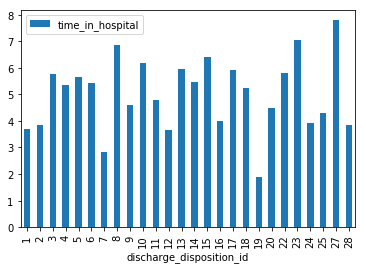

In [107]:
#average time in hospital by discharge disposition
print(diabetic[['discharge_disposition','time_in_hospital']].groupby('discharge_disposition',sort=True).mean())
ave_dis_time=diabetic[['discharge_disposition_id','time_in_hospital']].groupby('discharge_disposition_id',sort=True).mean()
ave_dis_time.plot(kind='bar')

                                                    time_in_hospital
admission_source                                                    
 Court/Law Enforcement                                      5.562500
 Emergency Room                                             4.387519
 Extramural Birth                                           3.000000
 Not Available                                              3.416000
 Not Mapped                                                 4.577640
 Physician Referral                                         4.257805
 Sick Baby                                                  3.000000
 Transfer from Ambulatory Surgery Center                    6.000000
 Transfer from a Skilled Nursing Facility (SNF)             5.829240
 Transfer from another health care facility                 4.426237
 Transfer from critial access hospital                      4.375000
 Transfer from hospital inpt/same fac reslt in ...         10.000000
Clinic Referral                   

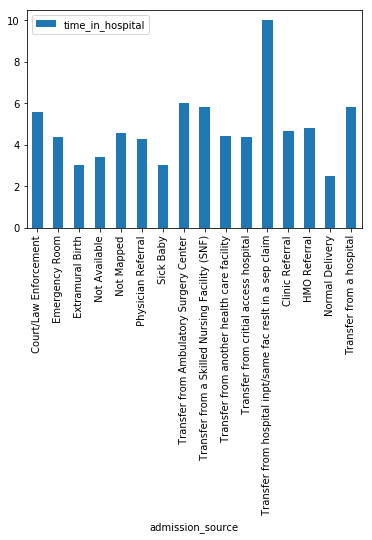

In [109]:
#average time in hospital by admission_source
print(diabetic[['admission_source','time_in_hospital']].groupby('admission_source',sort=True).mean())
ave_adms_time = diabetic[['admission_source','time_in_hospital']].groupby('admission_source',sort=True).mean()
ave_adms_time.plot(kind='bar')

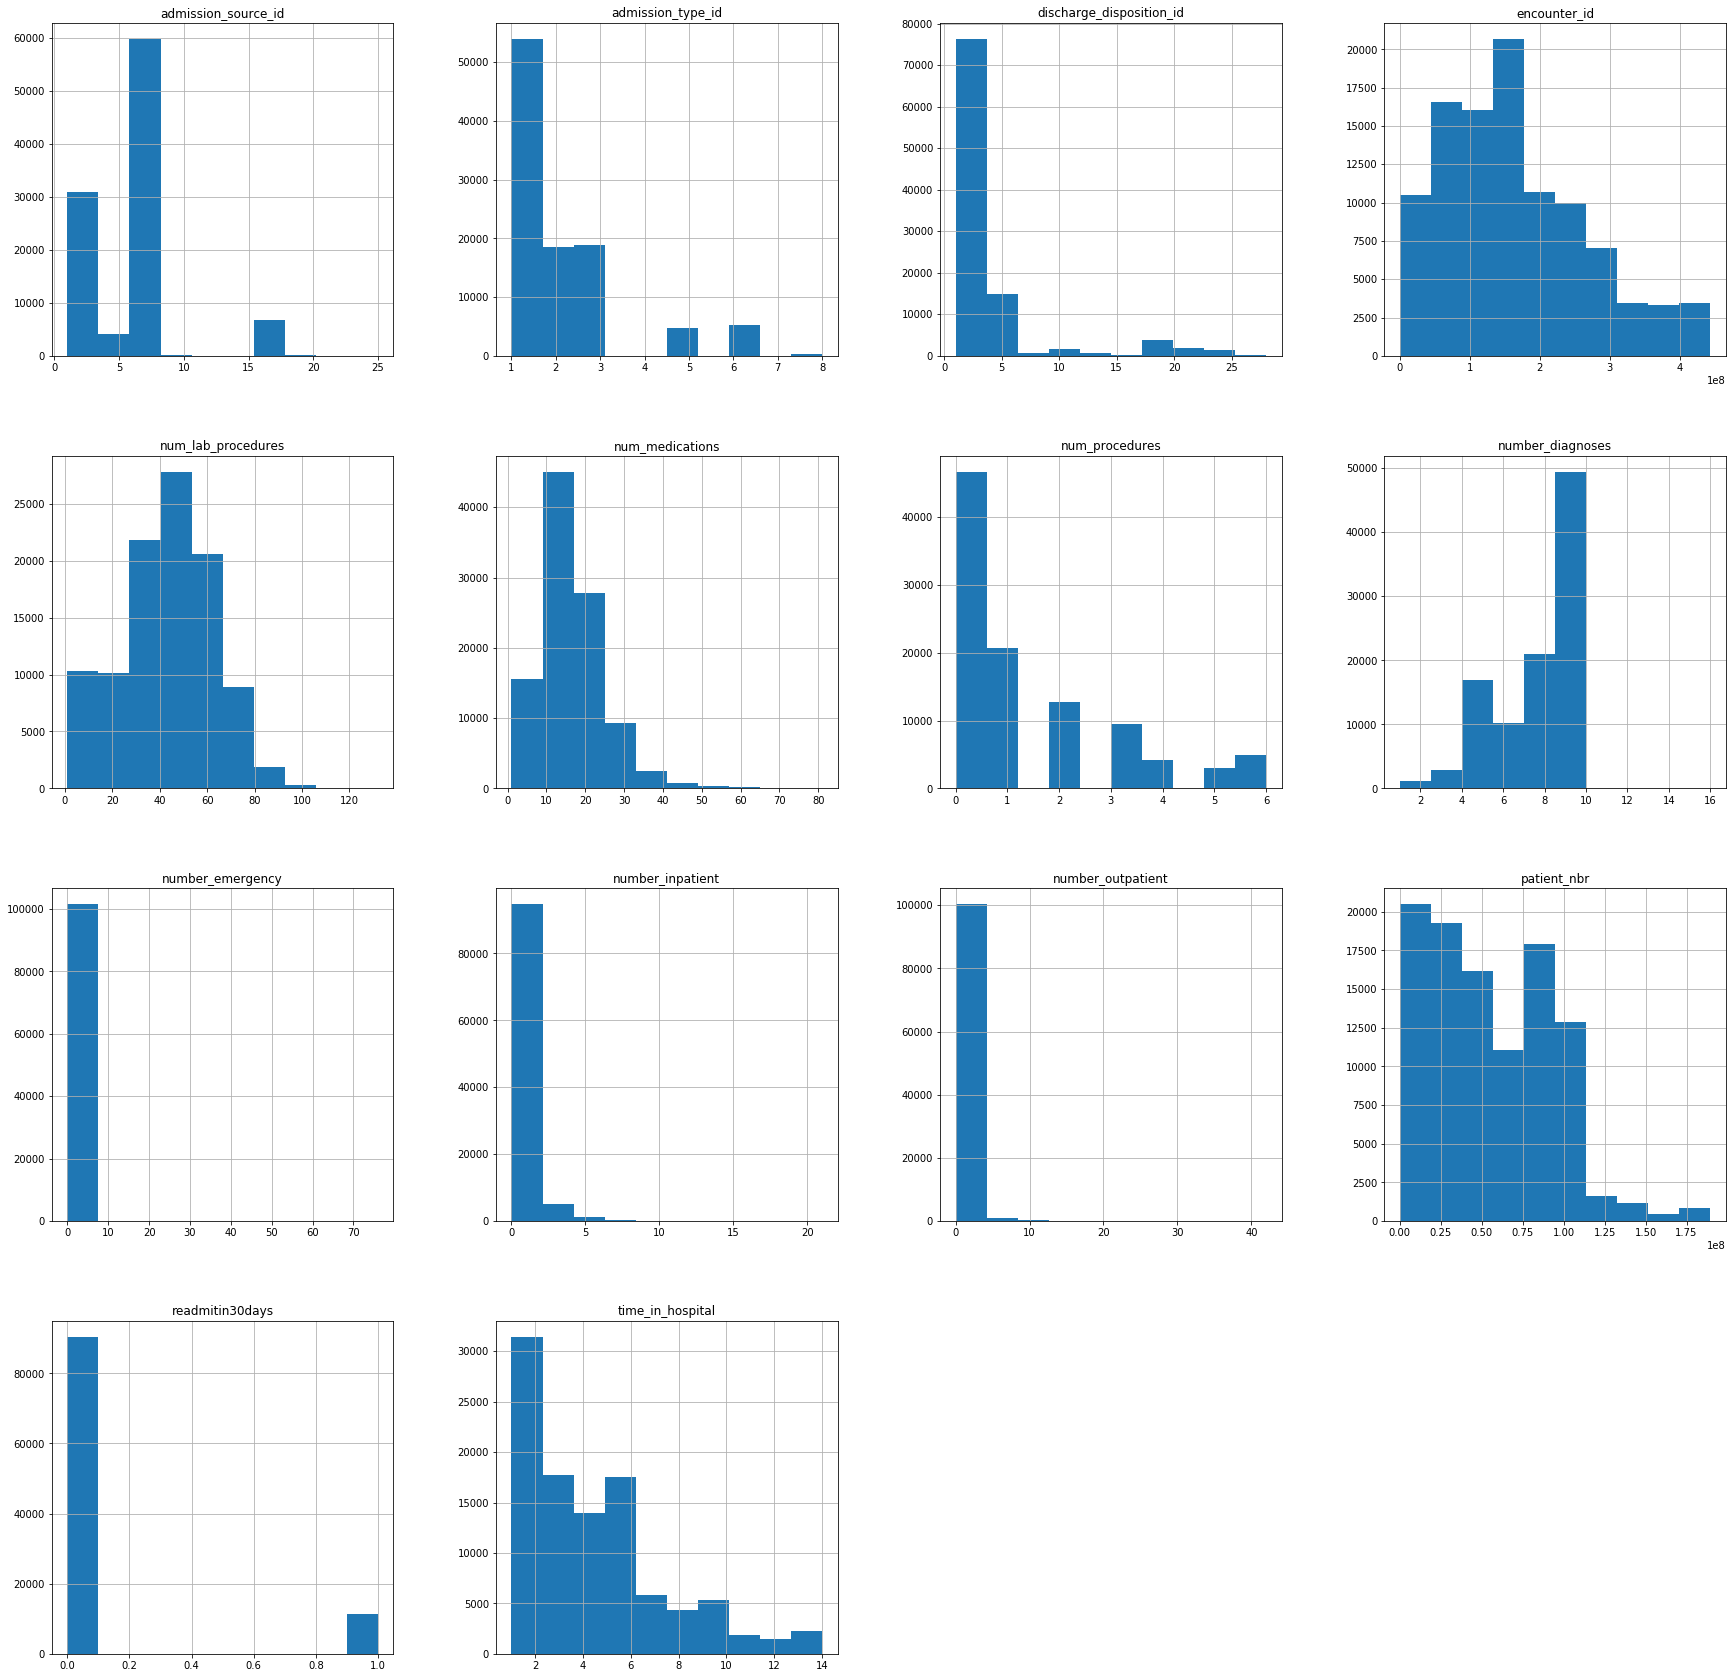

In [112]:
diabetic.hist(figsize=(30,30))
plt.show()

In [113]:
diabetic.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitin30days', 'admission_type', 'discharge_disposition',
       'admission_sourc

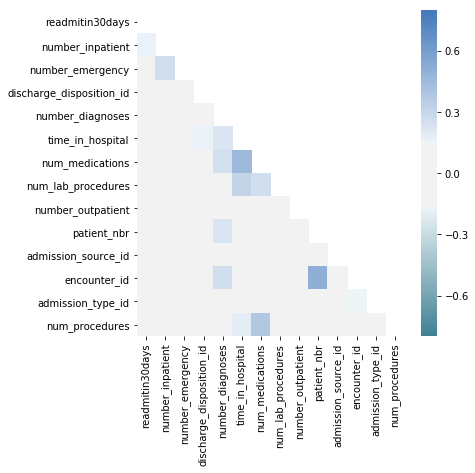

In [114]:
import seaborn as sns

# Calculate correlations
corr = diabetic.corr()

# Cluster by max
corr = corr.sort_values(by=['readmitin30days'], ascending=False, axis =0)
corr = corr.sort_values(by=['readmitin30days'], ascending=False, axis =1)

# Make it triangular
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 250, sep=50, as_cmap=True)
sns.heatmap(ax=ax, data=corr, mask=mask, cmap=cmap, vmin=-0.8, vmax=0.8)

__missing value imputation__

In [119]:

#create a column to determine if patient has diabetes or not
feature = ['diag_1','diag_2','diag_3']
for i in feature:
    diabetic[i] = diabetic[i].fillna('0')
    
# import re
# diabetic['diabetic'] = 0
# for i in range(len(diabetic)):
#     if(re.match(r"250.", diabetic.loc[i,"diag_1"])):
#         diabetic.loc[i,"diabetic"] = 1
#     else:
#         diabetic.loc[i,"diabetic"] = 0

In [121]:
# sort diagnosis

feature = ['diag_1','diag_2','diag_3']
for i in feature:
    diabetic[i] = diabetic[i].fillna('0')
def detection(v):
    if v[0]== "V" or v[0] == 'E':
        v = '9999'
        return v
    else:
        return v
for e in feature:
    for i in diabetic[e].index:
        diabetic[e].at[i] = detection(diabetic[e].at[i])

In [122]:
#Change diagnoses type to float
diabetic.diag_1 = diabetic.diag_1.astype(float)
diabetic.diag_2 = diabetic.diag_2.astype(float)
diabetic.diag_3 = diabetic.diag_3.astype(float)
diabetic.diag_1.dtypes


dtype('float64')

In [123]:
#create a description columns of diagnoses

def catagory(v):
    if 0.0 <= v < 1.0:
        return 'No Diagnosis'
    elif 1.0<= v < 140.0:
        return 'infectious and parasitic diseases'
    elif 140.0 <= v < 240.0:
        return 'neoplasms'
    elif 240.0 <= v < 280.0:
        return 'endocrine, nutritional and metabolic diseases, and immunity disorders'
    elif 280.0 <= v < 290.0:
        return 'diseases of the blood and blood-forming organs'
    elif 290.0 <= v < 320.0:
        return 'mental disorders'
    elif 320.0 <= v < 390.0:
        return 'diseases of the nervous system and sense organs'
    elif 390.0 <= v < 460.0:
        return 'diseases of the circulatory system'
    elif 460.0 <= v < 520.0:
        return 'diseases of the respiratory system'
    elif 520.0 <= v < 580.0:
        return 'diseases of the digestive system'
    elif 580.0 <= v < 630.0:
        return 'diseases of the genitourinary system'
    elif 630.0 <= v < 680.0:
        return 'complications of pregnancy, childbirth, and the puerperium'
    elif 680.0 <= v < 710.0:
        return 'diseases of the skin and subcutaneous tissue'
    elif 710.0 <= v < 740.0:
        return 'diseases of the musculoskeletal system and connective tissue'
    elif 740.0 <= v < 760.0:
        return 'congenital anomalies'
    elif 760.0 <= v < 780.0:
        return 'certain conditions originating in the perinatal period'
    elif 780.0 <= v < 800.0:
        return 'symptoms, signs, and ill-defined conditions'
    elif 800.0 <= v < 999.0:
        return 'injury and poisoning'
    else:
        return 'external causes of injury and supplemental classification'

diabetic['f_diag'] = diabetic.diag_1.apply(lambda v: catagory(v))
diabetic['s_diag'] = diabetic.diag_2.apply(lambda v: catagory(v))
diabetic['t_diag'] = diabetic.diag_3.apply(lambda v: catagory(v))
diabetic['f_diag'].head()


0    endocrine, nutritional and metabolic diseases,...
1                   diseases of the circulatory system
2                                 injury and poisoning
3                   diseases of the respiratory system
4    endocrine, nutritional and metabolic diseases,...
Name: f_diag, dtype: object

In [124]:
# create new columns for payercode
diabetic['self_pay'] = list(map(lambda x: 1 if x == "SP" else 0, diabetic['payer_code']))
diabetic['medicaid/medicare'] = list(map(lambda x: 1 if (x == "MD" or x == "MC") else 0, diabetic['payer_code']))
diabetic['coverByInsurance'] = list(map(lambda x: 1 if (x in ['HM','BC','CP', 'UN', 'CM', 'OG', 'PO', 'DM', 'CH', 'WC', 'OT', 'MP','SI', 'FR']) else 0, diabetic['payer_code']))


In [126]:

# make missing value to "other" value in "race" column
diabetic['race'] = diabetic['race'].replace(np.nan, 'Other')

In [127]:
#remove columns
rmlist = ['diag_1','diag_2','diag_3','readmitted', 'admission_type', 'admission_source','discharge_disposition']
diabetic = diabetic.drop(rmlist, axis = 1)

In [128]:
#impute missing value to 'No' in medical_specialty
diabetic['medical_specialty'] = diabetic['medical_specialty'].replace(np.nan, 'No')

In [132]:
diabetic.to_csv('./dataset_diabetes/diabetic2.csv')


__XGBoost__

In [377]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

ImportError: cannot import name 'cross_validation' from 'sklearn' (/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py)

In [378]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics  
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [315]:
diabetic3 = pd.read_csv("./dataset_diabetes/diabetic3.csv")

In [296]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [317]:
answer = diabetic3['readmitin30days']

In [319]:
categorical = diabetic3.select_dtypes(include = ["object"]).columns
numerical = diabetic3.select_dtypes(exclude = ["object"]).columns
print("Number of Categorical features: " + str(len(categorical)))
print("Number of Numerical features: " + str(len(numerical)))
diabetic3_categorical = diabetic3[categorical]
diabetic3_numerical = diabetic3[numerical]

Number of Categorical features: 34
Number of Numerical features: 18


In [320]:
categorical[4]

'max_glu_serum'

In [321]:
for i in range(len(categorical)):
    print(categorical[i])
    diabetic3[categorical[i]] = le.fit_transform(diabetic3[categorical[i]])

race
gender
age
medical_specialty
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
f_diag
s_diag
t_diag


In [322]:
diabetic3_categorical = pd.get_dummies(diabetic3_categorical)

In [328]:
diabetic_dum = pd.concat([diabetic3_numerical, diabetic3_categorical], axis = 1)
diabetic_dum.shape

(101766, 246)

In [341]:
diabetic_dum

,Unnamed: 0,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,t_diag_diseases of the nervous system and sense organs,t_diag_diseases of the respiratory system,t_diag_diseases of the skin and subcutaneous tissue,"t_diag_endocrine, nutritional and metabolic diseases, and immunity disorders",t_diag_external causes of injury and supplemental classification,t_diag_infectious and parasitic diseases,t_diag_injury and poisoning,t_diag_mental disorders,t_diag_neoplasms,"t_diag_symptoms, signs, and ill-defined conditions"
0,0,2278392,8222157,6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1968528,720936,6,25,1,10,56,2,24,...,0,0,0,1,0,0,0,0,0,0
2,2,2223336,558360,6,25,1,9,60,5,17,...,0,0,0,0,0,0,0,0,0,0
3,3,2298006,2519748,6,25,1,4,47,0,15,...,0,0,0,0,0,0,0,0,0,0
4,4,2356308,608841,6,25,1,1,50,0,8,...,0,0,0,1,0,0,0,0,0,0
5,5,2363592,1059561,6,25,1,1,1,6,8,...,0,0,0,0,0,0,0,0,0,0
6,6,2398146,8147493,6,25,1,1,31,2,8,...,0,0,0,0,0,0,0,0,0,0
7,7,2422806,3377124,6,25,1,14,41,1,18,...,0,0,0,1,0,0,0,0,0,0
8,8,2466036,4311585,6,25,1,10,46,6,23,...,0,0,0,1,0,0,0,0,0,0
9,9,2473188,981198,6,25,1,5,47,3,24,...,0,0,0,1,0,0,0,0,0,0


In [324]:
X = diabetic_dum
y = answer

In [435]:
def modelfit(alg, X, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X[predictors].values, label=answer.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X[predictors], answer,eval_metric='auc')
        
    #Predict training set:
    X_predictions = alg.predict(X[predictors])
    X_predprob = alg.predict_proba(X[predictors])[:,1]
            
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(answer, X_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(answer, X_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_score(importance_type='gain')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [416]:
x = X.copy()

In [429]:
x = X.copy()
x.columns = x.columns.str.replace(">","_more_")

In [430]:
sum(x.columns.str.contains(','))

0

In [431]:
X= x


Model Report
Accuracy : 0.8915
AUC Score (Train): 0.757696


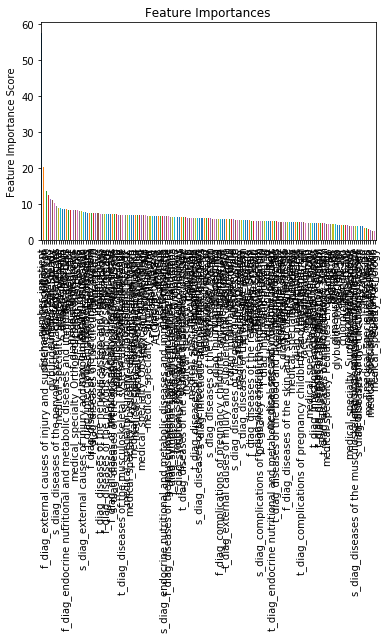

In [436]:
#Choose all predictors except target & IDcols
predictors = [x for x in X.columns]
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
modelfit(xgb1, X, predictors)

In [438]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_test1 = {
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2)
# }

# gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
# min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
# param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch1.fit(X[predictors],answer)
# gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# param_test2 = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch2.fit(X[predictors],answer)
# gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
# param_test3 = {
#  'gamma':[i/10.0 for i in range(0,5)]
# }
# gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
# min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
# param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch3.fit(X[predictors],answer)
# gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
# xgb2 = XGBClassifier(
# learning_rate =0.1,
# n_estimators=1000,
# max_depth=4,
# min_child_weight=6,
# gamma=0,
# subsample=0.8,
# colsample_bytree=0.8,
# objective= 'binary:logistic',
# nthread=4,
# scale_pos_weight=1,
# seed=27)
# modelfit(xgb2, train, predictors)

In [ ]:
# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
# min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
# param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch4.fit(X[predictors],answer)
# gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
# param_test5 = {
#  'subsample':[i/100.0 for i in range(75,90,5)],
#  'colsample_bytree':[i/100.0 for i in range(75,90,5)]
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]   
# }
# gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
# min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
# param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch5.fit(X[predictors],answer)

In [ ]:
# param_test6 = {
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# }
# gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
# min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
# param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch6.fit(X[predictors],answer)
# gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
# param_test7 = {
#  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
# }
# gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
# min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
# param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch7.fit(X[predictors],answer)
# gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

In [449]:
###Grid Search
#better practice would be to run randomized searchcv first to narrow down the range
#then run gridsearchcv

min_samples_split = [10, 11, 12]
min_samples_leaf = [2, 3]
min_child_weight = [1,6]
colsample_bytree = [0.7, 0.5, 0.3]
gamma = [0, 0.1, 0.3, 0.5]
learning_rate =  [0.1, 0.01] # default 0.1 
max_depth =  [2, 3, 4] # default 3
n_estimators = [50, 100, 150] # default 100
subsample =  [0.4, 0.6]
reg_alpha=[0.5, 0.4, 0.3, 0.2] 
grid_para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
               'min_child_weight': min_child_weight,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha}

grid_search_forest = GridSearchCV(model, grid_para, cv=4)
grid_search_forest.fit(X, answer)

bestparam= grid_search_forest.best_params_
bestscore= grid_search_forest.best_score_

KeyboardInterrupt: 

In [ ]:
# Fit the model
model = ensemble.RandomForestClassifier(oob_score=True, random_state = 0,**bestparam, class_weight = {0:1, 1:8})
#model.set_params(bestparam)
model.fit(X, Y)
model.score(X, Y)

In [331]:
model = XGBClassifier(base_score=0.5, colsample_bytree=0.5, 
                               gamma=0.017,learning_rate=0.15, max_delta_step=0, 
                               max_depth=55, min_child_weight=3, n_estimators=300, 
                               nthread=-1, objective='binary:logistic', seed=0, 
                               silent=True, subsample=0.9)
model.fit(X.values, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.017, learning_rate=0.15,
       max_delta_step=0, max_depth=8, min_child_weight=3, missing=None,
       n_estimators=300, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=True, subsample=0.9)

In [ ]:
X['random'] = np.random.randint(0,2, data.shape[0])
X['random'].value_counts()

In [326]:
fscore = model.get_booster().get_score(importance_type='gain')
fscore

{'f173': 3.146090557817553,
 'f10': 3.1559111813003287,
 'f174': 3.053852183654087,
 'f119': 3.426075206423077,
 'f50': 5.511412679999999,
 'f201': 3.587914608185715,
 'f17': 3.766534595393163,
 'f146': 2.9226555431666665,
 'f175': 3.037673535025642,
 'f8': 3.2051605562386967,
 'f16': 3.5351055171578967,
 'f47': 4.108799656614036,
 'f24': 2.7708907195433734,
 'f99': 3.8816683433414636,
 'f51': 3.5673515534374993,
 'f114': 3.75555519467347,
 'f122': 3.6250364922222227,
 'f212': 0.945303141,
 'f117': 3.268594426357143,
 'f244': 5.677510283448276,
 'f112': 2.946757929954545,
 'f111': 3.4008293055555554,
 'f204': 7.373422294636364,
 'f3': 3.203014646824211,
 'f221': 3.2335963149448816,
 'f233': 3.829680620827693,
 'f225': 2.850055713866666,
 'f142': 4.343601595454545,
 'f203': 3.7699502486022736,
 'f18': 3.051973889158696,
 'f33': 3.065187683580555,
 'f140': 3.5289222304590164,
 'f80': 4.135832836181818,
 'f238': 4.156116148307692,
 'f242': 3.358952077617647,
 'f236': 3.29511375726087,
 'f

In [338]:
model.feature_importances_[0:20]

array([0.1110744 , 0.11206571, 0.12599131, 0.01345355, 0.02808724,
       0.00977153, 0.03866125, 0.07231873, 0.02610461, 0.06646526,
       0.01425604, 0.01090446, 0.02062878, 0.02369713, 0.0025963 ,
       0.0016994 , 0.00896903, 0.00552304, 0.0043429 , 0.00042485],
      dtype=float32)

246


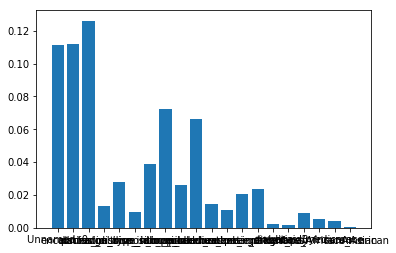

In [339]:
print(len(model.feature_importances_))
# plot
plt.bar(X.columns[0:20], model.feature_importances_[0:20])
plt.show()